In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as scipy
from scipy.stats import mode

In [ ]:
# Função meuKnn

def meuKnn(dadosTrain, rotuloTrain, dadosTeste, k):
    previsoes = []

    for teste in dadosTeste:
        distancias = np.linalg.norm(dadosTrain - teste, axis=1)

        indices_k_vizinhos = np.argsort(distancias)[:k]
        rotulos_k_vizinhos = rotuloTrain[indices_k_vizinhos]

        # valores, contagens = np.unique(rotulos_k_vizinhos, return_counts=True)
        # rotulo_predito = valores[np.argmax(contagens)]

        rotulo_predito = mode(rotulos_k_vizinhos, keepdims=False).mode

        previsoes.append(rotulo_predito)

    return np.array(previsoes)

# np.linalg.norm(dadosTrain - teste, axis=1): calcula a distância Euclidiana de um exemplo de teste para todos os exemplos de treino.
# np.argsort(distancias)[:k]: ordena as distâncias e pega os índices dos k vizinhos mais próximos.
# np.unique(..., return_counts=True): conta quantas vezes cada rótulo aparece entre os vizinhos.
# np.argmax(contagens): escolhe o rótulo que mais apareceu (votação majoritária).

In [ ]:
mat = scipy.loadmat('grupoDados1.mat')

grupoTest = mat['grupoTest']
grupoTrain = mat['grupoTrain']
trainRots = mat['trainRots'].ravel()
testRots = mat['testRots'].ravel()

# .ravel() para transformar em vetor 1D

rotuloPrevisto = meuKnn(grupoTrain, trainRots, grupoTest, 1);
estaCorreto = rotuloPrevisto == testRots;
numCorreto = sum(estaCorreto);
totalNum = len(testRots);

acuracia = numCorreto / totalNum

print(f"Acurácia: {acuracia*100:.2f}% ({numCorreto}/{totalNum})")

# trainRots e testRots precisam ser "achatados" (.ravel()) porque o scipy.loadmat carrega tudo como matrizes 2D, mas queremos vetores 1D
# para comparação.
# O cálculo da acurácia é simples: número de acertos dividido pelo total.
# O sum do Python virou np.sum, e o length virou len.

Acurácia: 96.00% (48/50)


In [ ]:
rotuloPrevisto = meuKnn(grupoTrain, trainRots, grupoTest, k=10)

# 4 e 6 - 98.00%

estaCorreto = rotuloPrevisto == testRots;
numCorreto = sum(estaCorreto);
totalNum = len(testRots);

acuracia = numCorreto / totalNum

print(f"Acurácia: {acuracia*100:.2f}% ({numCorreto}/{totalNum})")

Acurácia: 94.00% (47/50)


In [ ]:
def getDadosRotulo(dados, rotulos, rotulo, indice):

    ret = []
    for idx in range(0, len(dados)):
        if(rotulos[idx] == rotulo):

            ret.append(dados[idx][indice])

    return ret

getDadosRotulo(grupoTrain, trainRots, 1, 0)

[np.float64(5.1),
 np.float64(4.9),
 np.float64(4.6),
 np.float64(5.0),
 np.float64(4.6),
 np.float64(5.0),
 np.float64(4.9),
 np.float64(5.4),
 np.float64(4.8),
 np.float64(4.3),
 np.float64(5.7),
 np.float64(5.4),
 np.float64(5.7),
 np.float64(5.1),
 np.float64(5.1),
 np.float64(4.6),
 np.float64(4.8),
 np.float64(5.0),
 np.float64(5.2),
 np.float64(5.2),
 np.float64(4.8),
 np.float64(5.4),
 np.float64(5.5),
 np.float64(4.9),
 np.float64(5.5),
 np.float64(4.9),
 np.float64(5.1),
 np.float64(5.0),
 np.float64(4.4),
 np.float64(5.0),
 np.float64(4.8),
 np.float64(5.1),
 np.float64(5.3),
 np.float64(5.0)]

In [ ]:
def visualizaPontos(dados, rotulos, d1, d2):

    fig, ax = plt.subplots()

    ax.scatter(getDadosRotulo(dados, rotulos, 1, d1), getDadosRotulo(dados, rotulos, 1, d2), c='red' , marker='^')
    ax.scatter(getDadosRotulo(dados, rotulos, 2, d1), getDadosRotulo(dados, rotulos, 2, d2), c='blue' , marker='+')
    ax.scatter(getDadosRotulo(dados, rotulos, 3, d1), getDadosRotulo(dados, rotulos, 3, d2), c='green', marker='.')

    plt.show()

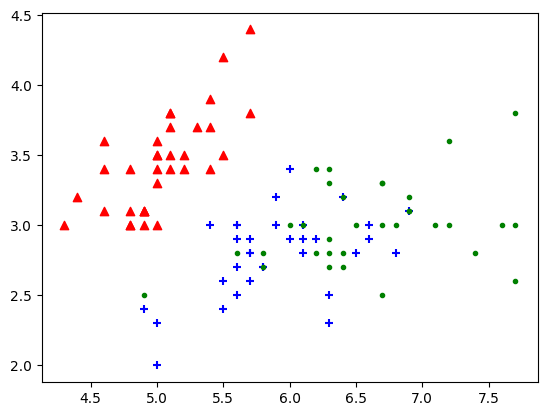

In [ ]:
visualizaPontos(grupoTrain, trainRots, 0, 1)

In [ ]:
# Grupo de Dados 1:

# O grupoDados1 é um conjunto de dados de flores. Para mais informações consulte: http://archive.ics.uci.edu/ml/datasets/Iris .

# Q1.1. Qual é a acurácia máxima que você consegue da classificação? 3, 4 e 6

rotuloPrevisto = meuKnn(grupoTrain, trainRots, grupoTest, k=3)

estaCorreto = rotuloPrevisto == testRots;
numCorreto = sum(estaCorreto);
totalNum = len(testRots);

acuracia = numCorreto / totalNum

print(f"Acurácia: {acuracia*100:.2f}% ({numCorreto}/{totalNum})")

###################################################################

rotuloPrevisto = meuKnn(grupoTrain, trainRots, grupoTest, k=4)

estaCorreto = rotuloPrevisto == testRots;
numCorreto = sum(estaCorreto);
totalNum = len(testRots);

acuracia = numCorreto / totalNum

print(f"Acurácia: {acuracia*100:.2f}% ({numCorreto}/{totalNum})")

##################################################################

rotuloPrevisto = meuKnn(grupoTrain, trainRots, grupoTest, k=6)

estaCorreto = rotuloPrevisto == testRots;
numCorreto = sum(estaCorreto);
totalNum = len(testRots);

acuracia = numCorreto / totalNum

print(f"Acurácia: {acuracia*100:.2f}% ({numCorreto}/{totalNum})")

Acurácia: 98.00% (49/50)
Acurácia: 98.00% (49/50)
Acurácia: 98.00% (49/50)


In [ ]:
# Q1.2. É necessário ter todas as características (atributos) para obter a acurácia máxima para esta classificação?